<a href="https://colab.research.google.com/github/MoizAhmed2517/Regression_Projects/blob/main/X_ray_signal_to_determine_rock_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining rock density based on X_ray signals

Based on a rebound signal strenght in nHz, we can estimate a density of rock in kg/m3.

Remember! the values of X-rays have signla in range of 0 to 100 nHZ

### Models used in this regression problem are:

* Linear Regression
* Polynomial Regression
* KNN Regression
* Decision Tree Regression
* Support Vector Regression
* Boosted Trees Regression
* Random Forest Regression

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

In [5]:
df = pd.read_csv('rock_density_xray.csv')

df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<function matplotlib.pyplot.show(*args, **kw)>

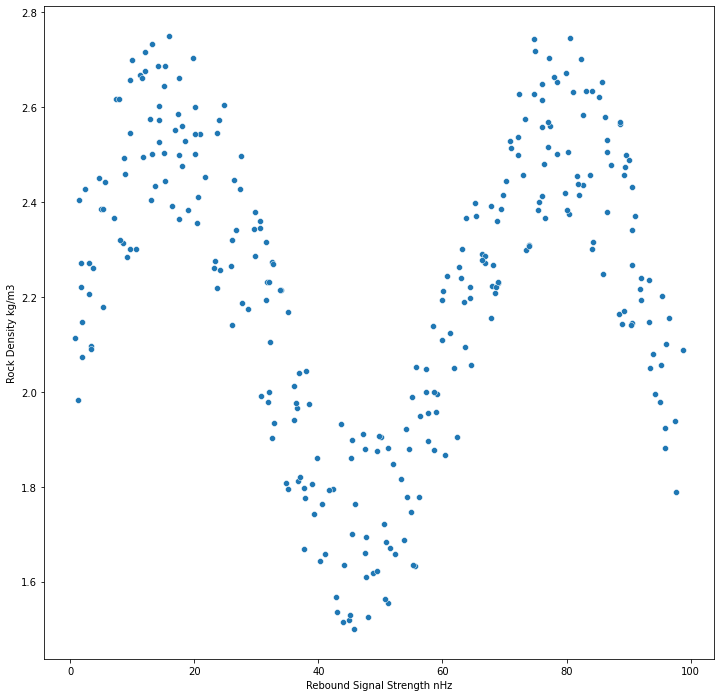

In [9]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df, y='Rock Density kg/m3', x='Rebound Signal Strength nHz')
plt.show

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rebound Signal Strength nHz,300.0,49.725766,28.341792,0.700227,25.685798,50.602886,74.854294,98.831658
Rock Density kg/m3,300.0,2.225063,0.314512,1.500000,1.987830,2.268597,2.476944,2.750000


In [11]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns=['Signal', 'Density']

In [14]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


Using linear regression will not be good idea but we will do to prove our hypothesis

In [17]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.1)

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_preds = linear_model.predict(X_test)

In [23]:
rmsr_linear = np.sqrt(mean_squared_error(y_test, y_preds))
mae_linear = mean_absolute_error(y_test, y_preds)
r_score = r2_score(y_test, y_preds) * 100
rmsr_linear, mae_linear, r_score

(0.2570051996584629, 0.211198973318633, -3.4267281425702123)

In [25]:
signal_range = np.arange(0, 100)
signal_preds = linear_model.predict(signal_range.reshape(-1, 1))

<function matplotlib.pyplot.show(*args, **kw)>

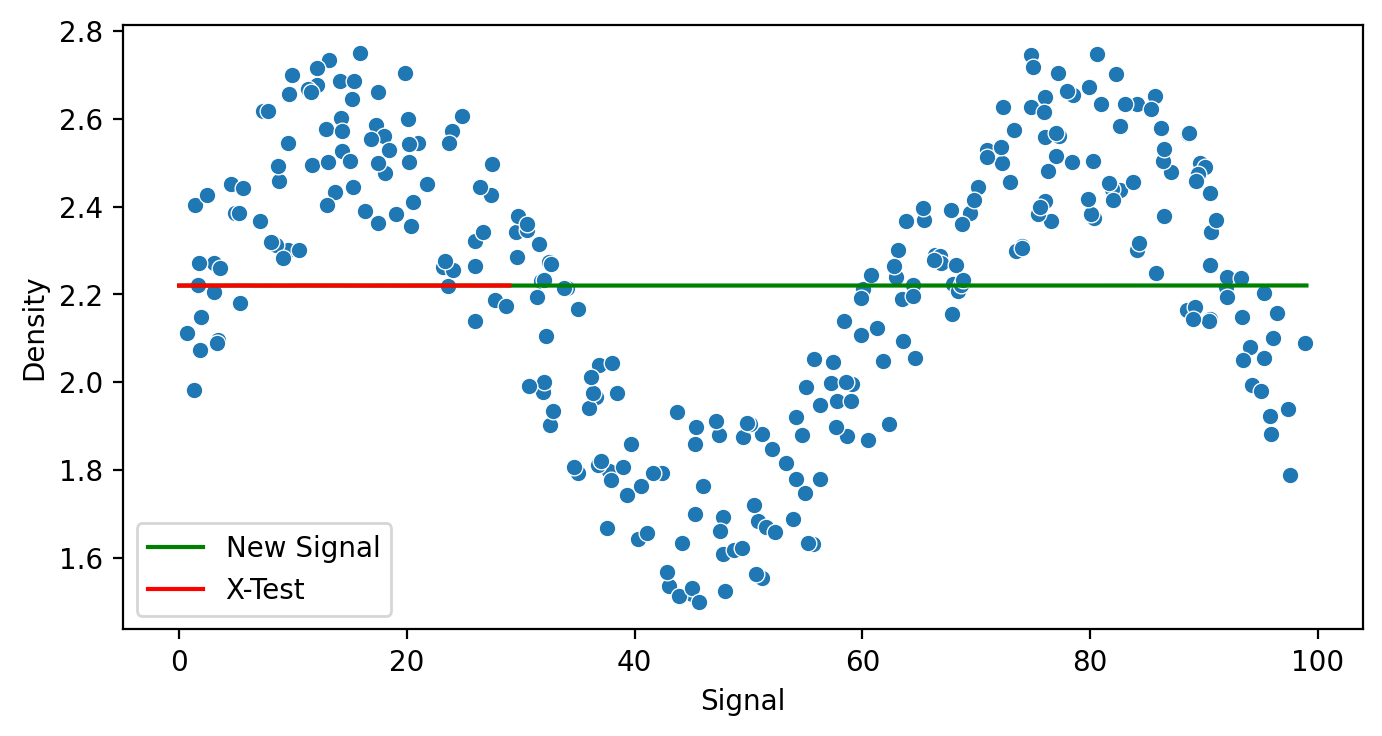

In [35]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df, y='Density', x='Signal')
plt.plot(signal_range ,signal_preds, color='green', label='New Signal')
plt.plot(range(len(y_preds)), y_preds, color='red', label='X-Test')
plt.legend()
plt.show

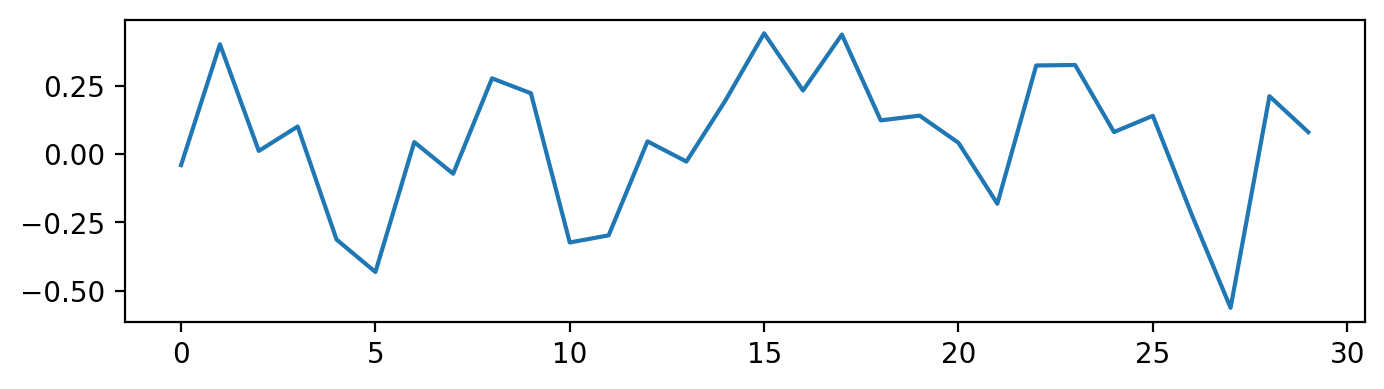

In [43]:
error = y_test - y_preds
plt.figure(figsize=(8, 2), dpi=200)
plt.plot(range(len(error)), error)
plt.show()

Linear regression is just making an average on curvature dataset hence it is not a good approach to use linear regression model

In [86]:
# Helper function to fit, predict and plot the results of different models

def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r_score = r2_score(y_test, preds) * 100

    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"r2_score: {round(r_score, 2)}%")

    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize=(8, 4), dpi=100)
    sns.scatterplot(data=df, y='Density', x='Signal')
    plt.plot(signal_range, output, color='green', label='New Signal')
    plt.title("Signal Prediction")
    plt.legend()

    error = y_test - preds
    plt.figure(figsize=(8, 2), dpi=100)
    plt.plot(range(len(error)), error)
    plt.title("Error Plot")
    plt.show

MAE: 0.211198973318633
RMSE: 0.2570051996584629
r2_score: -3.43%


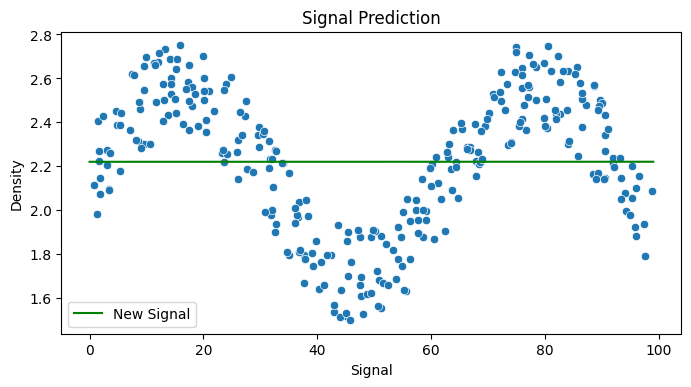

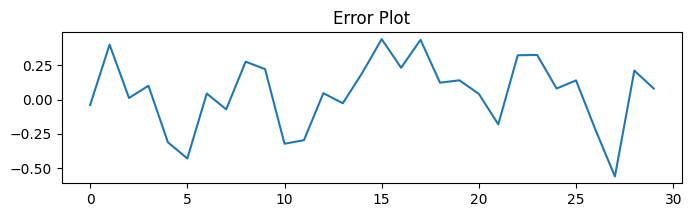

In [87]:
run_model(linear_model,X_train,y_train,X_test,y_test)

Using Polynomial Regression to make perfect regression model

MAE: 0.22903105443511335
RMSE: 0.2817309563725596
r2_score: -24.28%


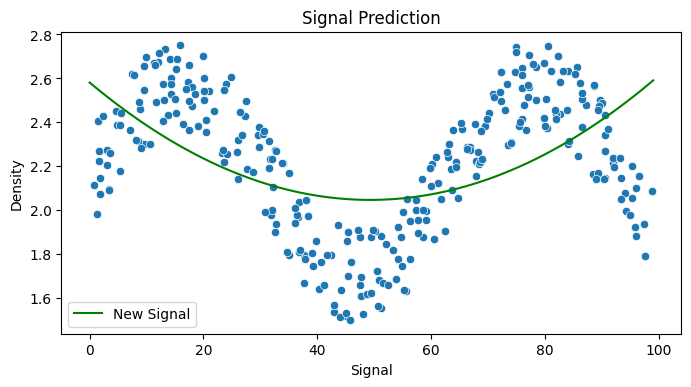

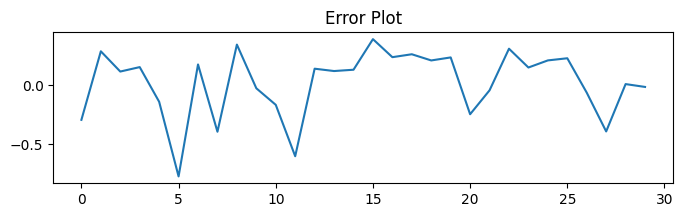

In [88]:
pipe_deg_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
run_model(pipe_deg_2,X_train,y_train,X_test,y_test)

MAE: 0.24211834039531543
RMSE: 0.2879748127918895
r2_score: -29.85%


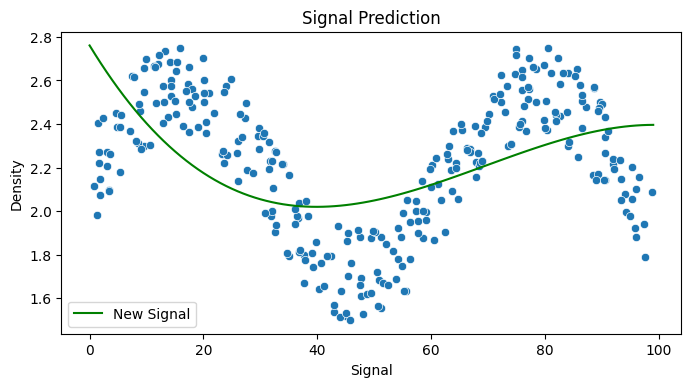

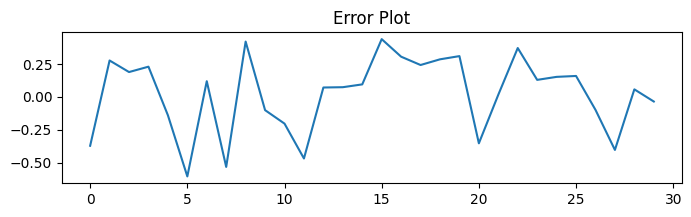

In [89]:
pipe_deg_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
run_model(pipe_deg_3,X_train,y_train,X_test,y_test)

MAE: 0.1249966736005647
RMSE: 0.1407876660205461
r2_score: 68.96%


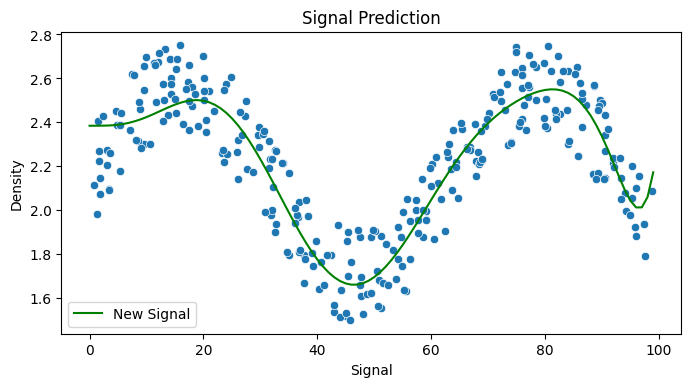

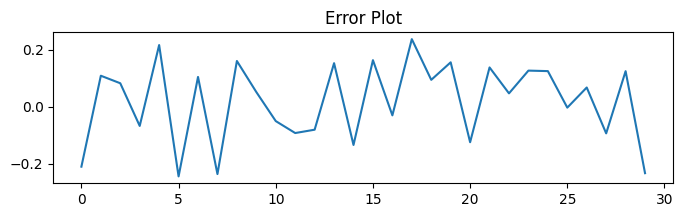

In [90]:
pipe_deg_10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
run_model(pipe_deg_10,X_train,y_train,X_test,y_test)

It is observe increasing frequency increasing the model is fitting perfecly or in other words it is predicting accurately.

But point to be noted here that incresing polynomial will make model complex and it is overfitting.

MAE: 0.11969122389484065
RMSE: 0.1380744906136982
r2_score: 70.15%


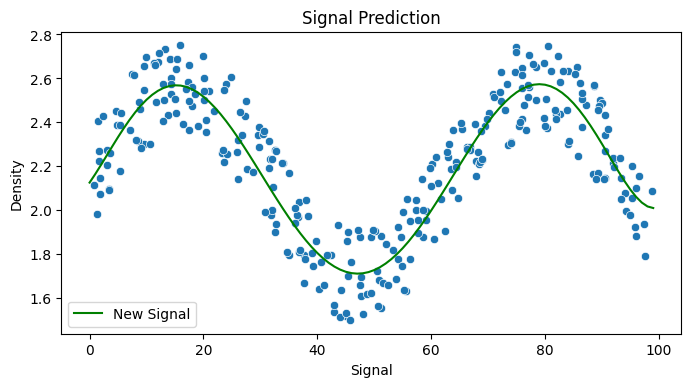

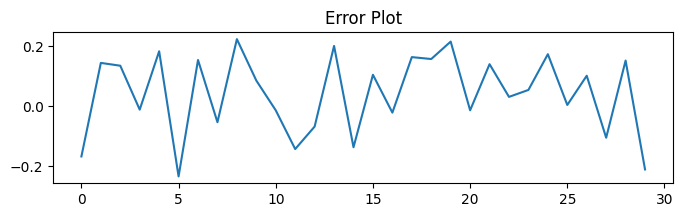

In [91]:
# Trying one more polynomial degree

pipe_deg_6 = make_pipeline(PolynomialFeatures(6), LinearRegression())
run_model(pipe_deg_6,X_train,y_train,X_test,y_test)

MAE: 0.11864312007829593
RMSE: 0.1445281308082368
r2_score: 67.29%


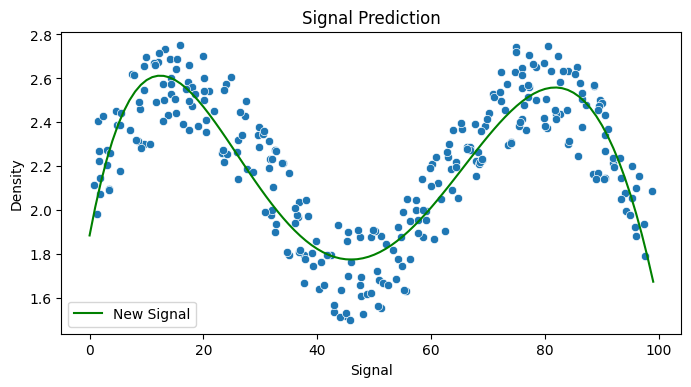

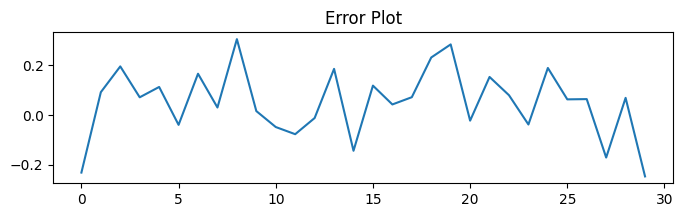

In [93]:
pipe_deg_5 = make_pipeline(PolynomialFeatures(5), LinearRegression())
run_model(pipe_deg_5,X_train,y_train,X_test,y_test)

Currently we know that our model is capable of predicting values between 0 to 100. Using polynomial regression with degree of 6 we can achieve better prediction results but when signal strength increased from 100 to onwards than our model will fail. So we need to use another methods to make it more generalize models